In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

c:\Users\mai\anaconda3\envs\bmc\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
config_file = '../mmsegmentation/work_dirs/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k.py'
checkpoint_file = '../mmsegmentation/work_dirs/segformer_mit-b0_512x512_160k_ade20k/iter_160000.pth'

In [5]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: ../mmsegmentation/work_dirs/segformer_mit-b0_512x512_160k_ade20k/iter_160000.pth


c:\users\mai\bowel_movement_cleaness\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [7]:
# test a single image
img = '../data/bmc/0270.jpg'
result = inference_segmentor(model, img)

c:\users\mai\bowel_movement_cleaness\mmsegmentation\mmseg\models\segmentors\base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


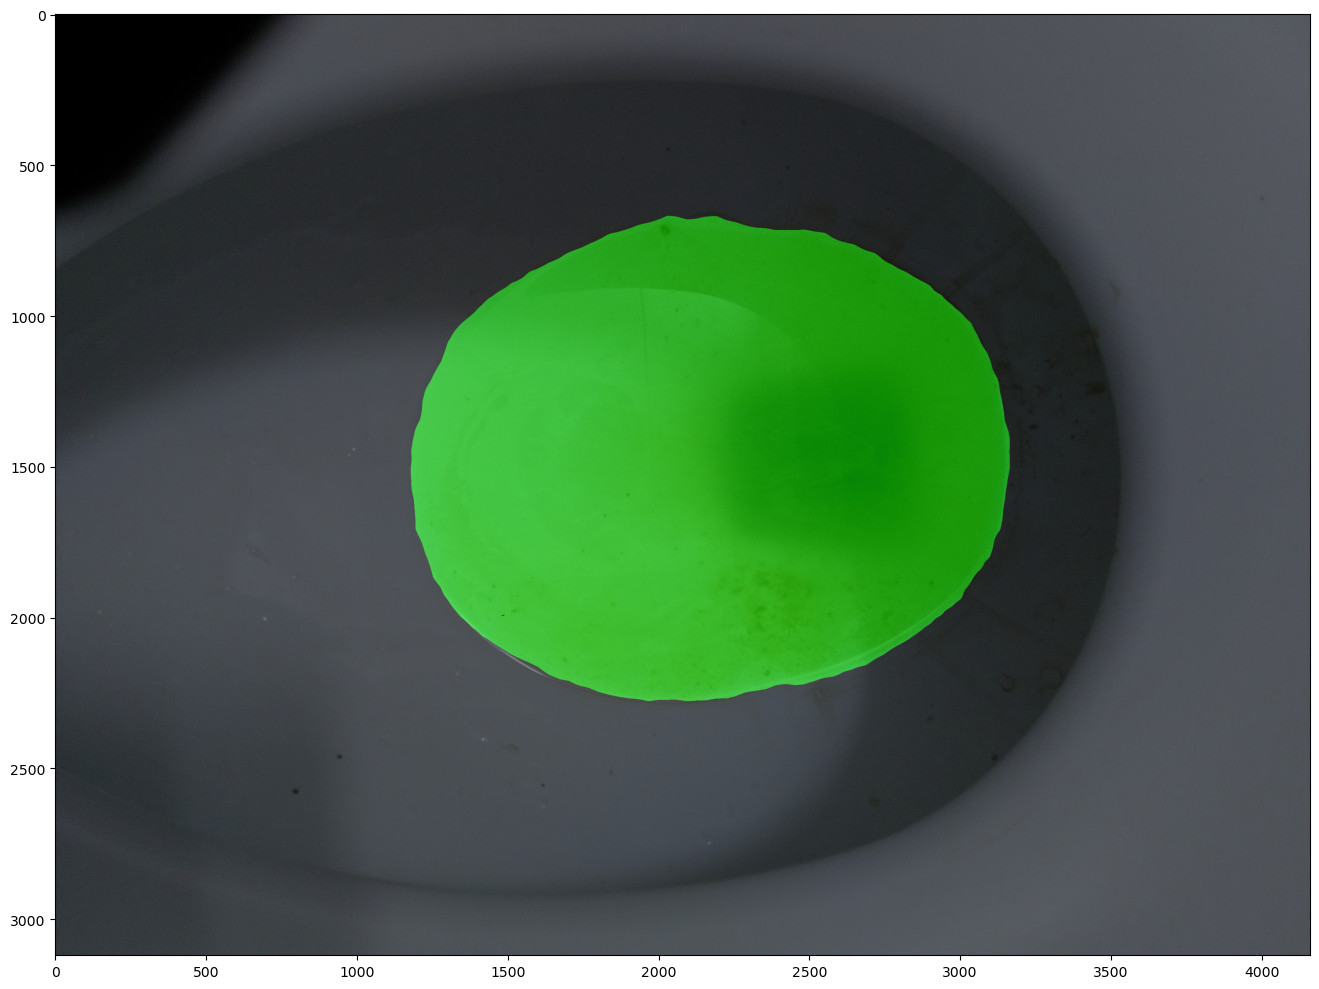

In [8]:
# show the results
show_result_pyplot(model, img, result, [[0,0,0],[255,1,1],[1,255,1],[1,1,255]])

---

In [10]:
from glob import glob
import pandas as pd

In [11]:
val_list = glob("../data/bmc_label_voc_split2/images/val/*.jpg")

In [12]:
true_label = pd.read_csv("../bmc.csv")

In [47]:
inference = {"idx":[], "answer":[]}
for img in val_list:
    result = inference_segmentor(model, img)
    label0 = (result[0]==1).sum()
    label1 = (result[0]==2).sum()
    label2 = (result[0]==3).sum()
    label_list = [label0,label1,label2]
    inference["idx"].append(np.argmax(label_list))
    inference["answer"].append(int(img.split("\\")[1][:-4]))

In [61]:
test = pd.DataFrame.from_dict(inference)

In [63]:
test.columns = ["answer","idx"]

In [64]:
test

,answer,idx
0,0,0
1,0,6
2,0,7
3,0,10
4,0,13
...,...,...
212,1,1061
213,2,1064
214,0,1070
215,2,1073


In [73]:
df_INNER_JOIN = pd.merge(test, true_label, on='idx')
df_INNER_JOIN

,answer,idx,origin_name,color,residue,turbidity,label
0,0,0,1301837407-1,0,0,0,0
1,0,6,626443490-1,0,1,0,0
2,0,7,IMG_20190923_231959,0,0,0,0
3,0,10,IMG_20191120_055633,0,0,0,0
4,0,13,IMG_20200210_203306,0,0,0,0
...,...,...,...,...,...,...,...
212,1,1061,IMG_20220426_201934,2,1,1,1
213,2,1064,IMG_20220426_203317_1,2,1,1,2
214,0,1070,IMG_20220427_043020_1,2,0,1,0
215,2,1073,IMG_20220428_210303,2,2,1,2


In [94]:
wrong = df_INNER_JOIN[df_INNER_JOIN.answer != df_INNER_JOIN.label]
wrong

,answer,idx,origin_name,color,residue,turbidity,label
50,1,270,IMG_20211026_000748,1,1,0,0
56,1,305,IMG_20220207_204722,1,1,0,0
60,1,314,IMG_20220315_235219,1,1,0,0
64,1,331,tmp_1635657899720,1,2,0,0
68,2,339,1589028361-1,2,2,0,1
72,1,347,775896744-1,2,1,1,2
74,2,355,IMG_20190919_155644,2,1,0,1
84,0,421,IMG_20200526_134442,2,2,0,1
107,1,527,IMG_20210201_183610,2,2,1,2
123,2,608,IMG_20210418_190527,2,1,1,1


In [93]:
wrong.groupby("label").count()["answer"] / len(wrong) * 100

label
0    22.222222
1    61.111111
2    16.666667
Name: answer, dtype: float64

In [99]:
wrong[wrong["label"] == 1].groupby("answer").count()["idx"]

answer
0    3
2    8
Name: idx, dtype: int64

In [84]:
len(df_INNER_JOIN[df_INNER_JOIN.answer == df_INNER_JOIN.label]) / len(df_INNER_JOIN)

0.9170506912442397